<a href="https://colab.research.google.com/github/AnnSvechnikova/TMO_spring2023/blob/main/tmo_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для исследования будем использовать набор данных об анализах пациентов, больных диабетом - https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

Эти сведения позволяют оценить текущее состояние пациентов и выявить взаимосвязь между различными характеристиками организма пациента.
Датасет состоит из одного файла, содержащего следующие колонки:

* age - возраст

* sex - пол

* bmi - индекс массы тела

* bp - среднее кровяное давление

* s1 tc - общий уровень холестерина в сыворотке крови

* s2 ldl - липопротеины низкой плотности

* s3 hdl - липопротеины высокой плотности

* s4 tch - общий холестерин

* s5 ltg - возможная регистрация уровня триглицеридов в сыворотке крови

* s6 glu - уровень сахара в крови

Значения во всех колонках были центрированы и нормализованы.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *

In [ ]:
data = load_diabetes()
dset = pd.DataFrame(data = data.data, columns = data.feature_names)

**Основные статистические характеристики датасета:**

In [ ]:
#первые 5 строк
dset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
dset.shape
#расзмер датасета: 442 строки, 10 колонок

(442, 10)

In [ ]:
#получим список колонок с типами и убедимся, что нет пустых значений
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
#основные статистические характеристики
dset.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


**Визуальное исследование:**

<Axes: xlabel='age', ylabel='bmi'>

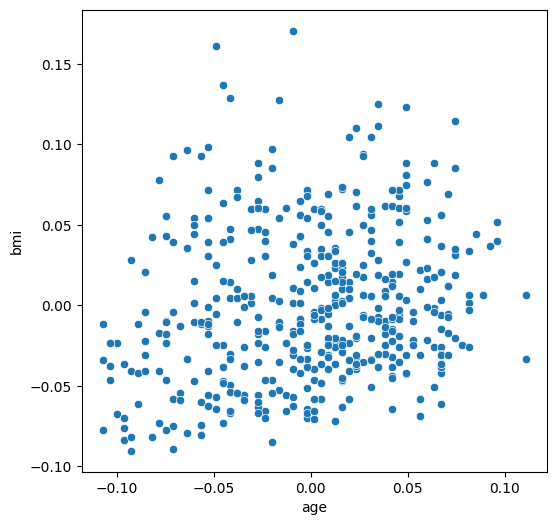

In [ ]:
# диаграмма рассеяния
fig, ax = plt.subplots(figsize=(6,6)) 
sns.scatterplot(ax=ax, x='age', y='bmi', data=dset)

Видно, что датасет содержит данные о пациентах разного возраста и с разным индексом массы тела.

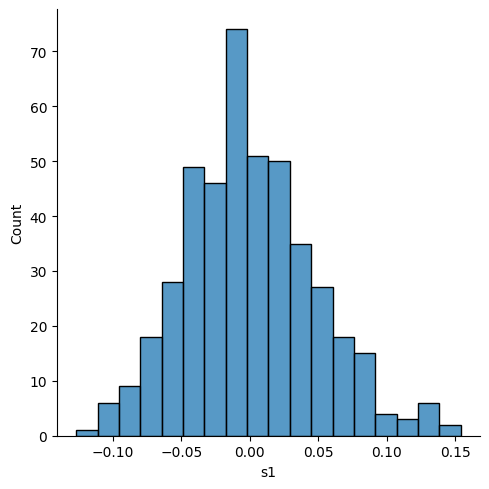

In [ ]:
sns.displot(dset, x="s1")

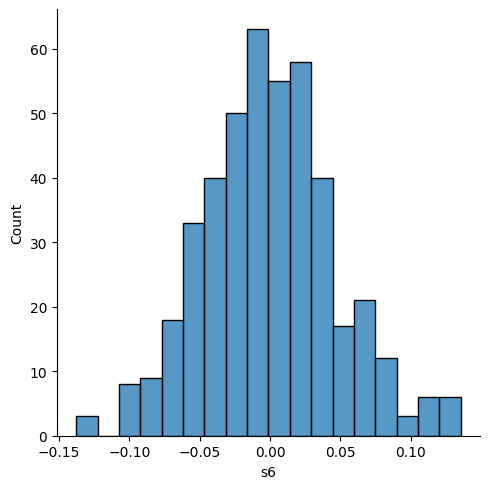

In [ ]:
sns.displot(dset, x="s6")

Большинство пациентов имеет средние значения общего уровня холестерина в сыворотке крови и уровня сахара, а также уровня триглицеридов.

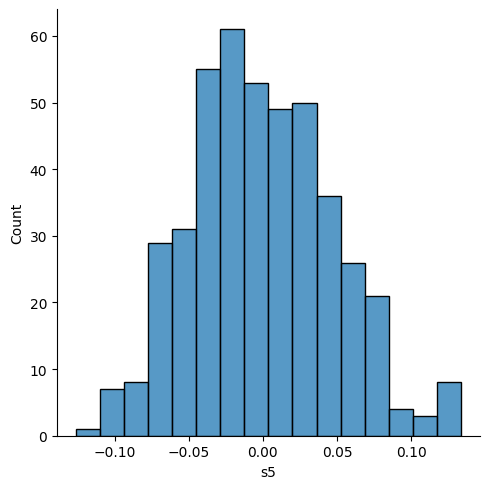

In [ ]:
sns.displot(dset, x="s5")

<Axes: xlabel='sex', ylabel='bp'>

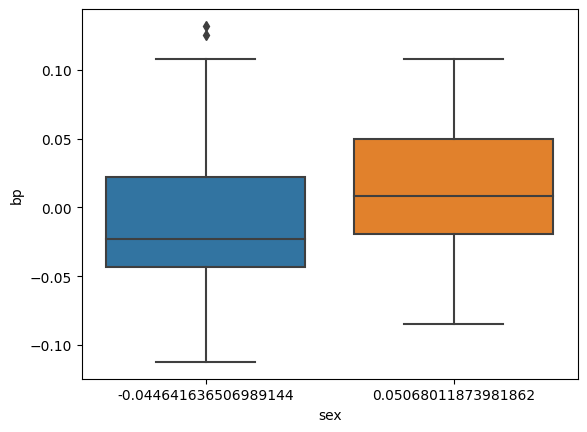

In [ ]:
sns.boxplot(dset, x="sex", y="bp")

Представители одного пола имеют более широкий диапазон значений давления, чем представители другого. Тем не менее, пациентов с высоким давлением заметно больше, чем пациентов с низким. Также присутствуют выбросы - аномально большие значения.

<Axes: xlabel='s1', ylabel='s2'>

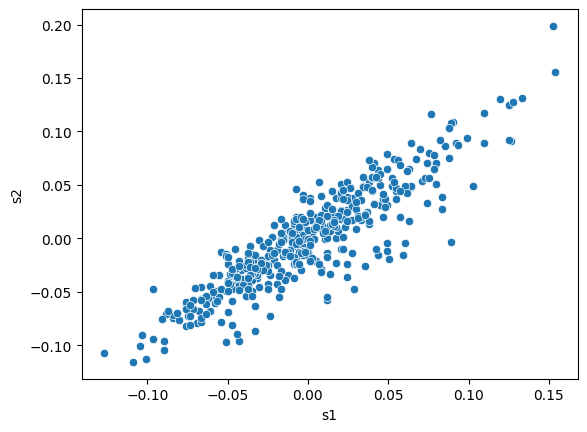

In [ ]:
sns.scatterplot(data = dset, x="s1", y="s2")

С повышением уровня холестерина повышается уровень липопротеинов низкой плотности.

<Axes: xlabel='s1', ylabel='s3'>

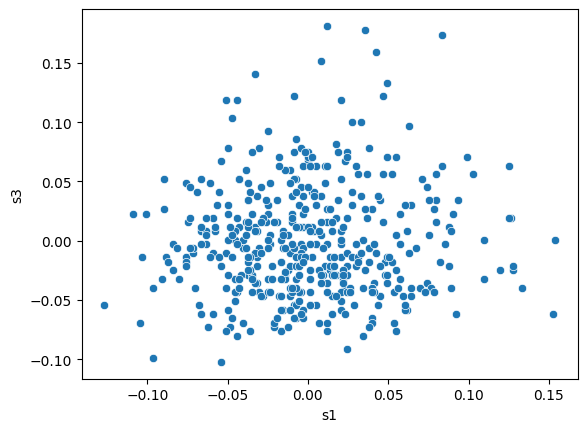

In [ ]:
sns.scatterplot(data = dset, x="s1", y="s3")

А для липопротеинов высокой плотности такой зависимости нет.

<Axes: xlabel='s1', ylabel='s4'>

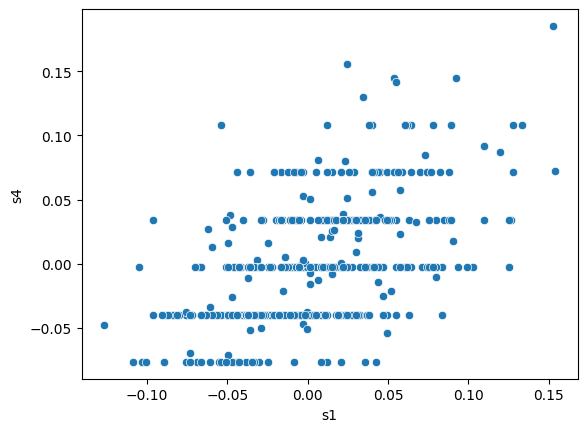

In [ ]:
sns.scatterplot(dset, x="s1", y="s4")

Пациенты с одним и тем же уровнем общего холестерина могут иметь различный уровень холестерина в сыворотке крови.

**Информация о корреляции признаков**

Целевым признаком будем считать уровень сахара в крови s6, так как именно этот параметр нужно тщательно отслеживать больным диабетом. Проверим, какие признаки оказывают на него наибольшее влияние.

In [ ]:
dset.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


*   Нельзя сказать, что какой-то признак оказывает особенно сильное влияние на целевой, т.к. в соответствующих ячейках матрицы корреляции нет значений, очень близких к 1. 

*   Больше всего с целевым признаком коррелируют s5 - уровень триглицеридов, и s4 - общий холестерин.

*   Меньше всего целевой признак зависит от пола пациента.

*   Коэффициент корреляции между s1 и s2 очень близок к единице. Это подтверждает вид диаграммы рассеяния для этих признаков. Достаточно оставить один из этих признаков, например, s1, потому что он сильнее коррелирует с целевым.

Визуализируем корреляционную матрицу.

<Axes: >

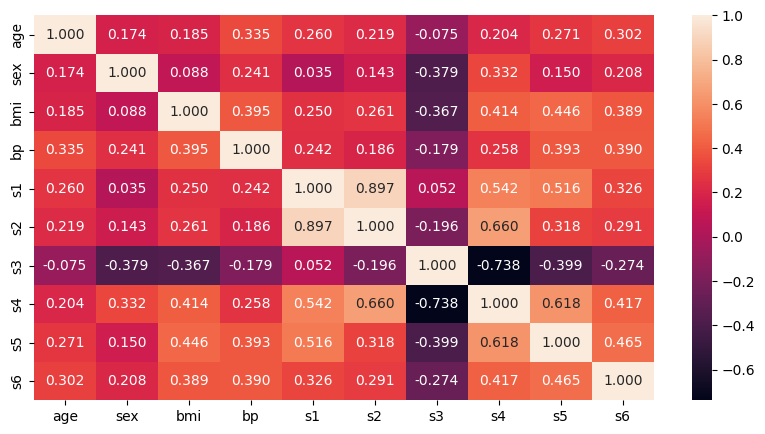

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
sns.heatmap(dset.corr(), annot=True, fmt='.3f')

Визуализируем корреляционные матрицы, построенные с использованием различных методов расчета коэффициента корреляции. Как и ожидалось, существенных различий между матрицами нет.

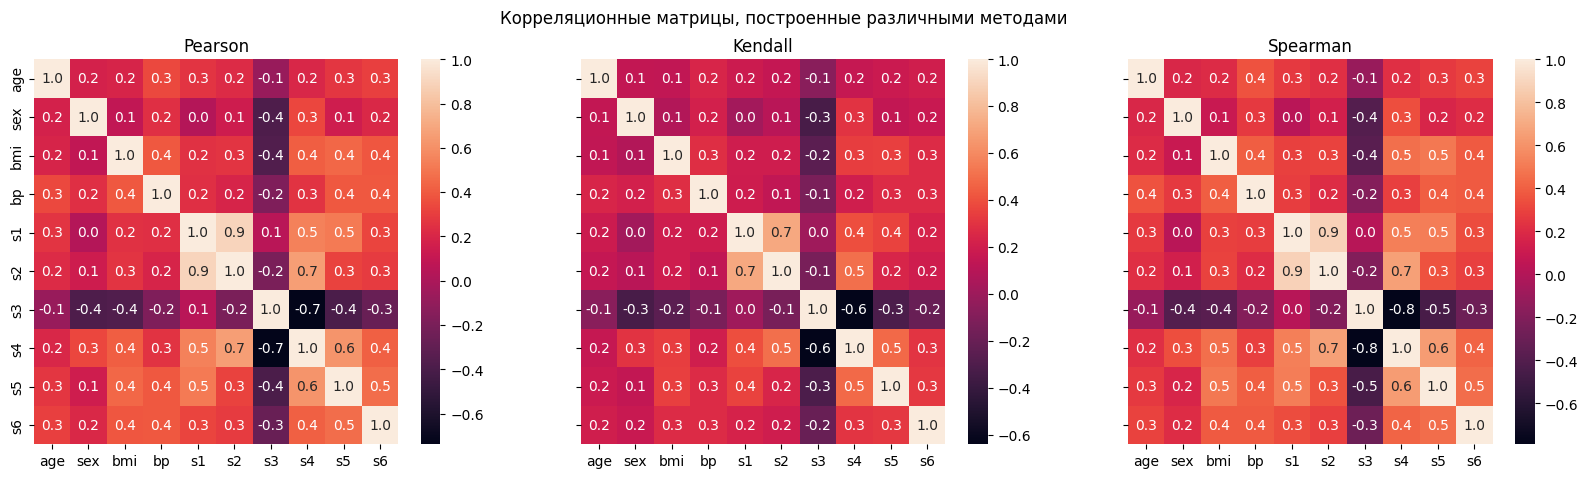

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20,5))
sns.heatmap(dset.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(dset.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(dset.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

